In [14]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating environment at `~/GitHub/lecture-notebooks/Lecture 7/Project.toml`


In [15]:
using LinearAlgebra
using PyPlot
using SparseArrays

In [16]:
# Discrete dynamics
h = 0.1   # time step
A = [1 h; 0 1]
B = [0.5*h*h; h]

2-element Vector{Float64}:
 0.005000000000000001
 0.1

In [17]:
n = 2     # number of state
m = 1     # number of controls
Tfinal = 10.0 # final time
N = Int(Tfinal/h)+1    # number of time steps
thist = Array(range(0,h*(N-1), step=h));

In [18]:
# Initial conditions
x0 = [1.0; 0]

2-element Vector{Float64}:
 1.0
 0.0

In [19]:
# Cost weights
Q = sparse(1.0*I(2))
R = sparse(0.1*I(1))
Qn = sparse(1.0*I(2))

2×2 SparseMatrixCSC{Float64, Int64} with 2 stored entries:
 1.0   ⋅ 
  ⋅   1.0

In [20]:
#Cost function
function J(xhist,uhist)
    cost = 0.5*xhist[:,end]'*Qn*xhist[:,end]
    for k = 1:(N-1)
        cost = cost + 0.5*xhist[:,k]'*Q*xhist[:,k] + 0.5*(uhist[k]'*R*uhist[k])[1]
    end
    return cost
end

J (generic function with 1 method)

In [21]:
# Cost
H = blockdiag(R, kron(I(N-2), blockdiag(Q,R)), Qn);

In [22]:
# Constraints
C = kron(I(N-1), [B -I(2)])
for k = 1:N-2
    C[(k*n).+(1:n), (k*(n+m)-n).+(1:n)] .= A
end
d = [-A*x0; zeros(size(C,1)-n)];

In [23]:
# Solve the linear system
y = [H C'; C zeros(size(C,1),size(C,1))]\[zeros(size(H,1)); d]

# Get state history
z = y[1:size(H,1)]   # states and controls [u0,x1,u1,...,xN]
Z = reshape(z,n+m,N-1)
xhist = Z[m+1:end,:]
xhist = [x0 xhist]

# Get control history
uhist = Z[1,:];

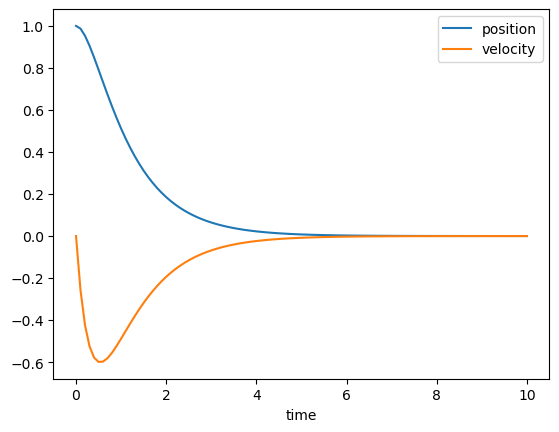

PyObject <matplotlib.legend.Legend object at 0x17be7f7f0>

In [24]:
# Plot x1 vs. x2, u vs. t, x vs. t, etc.
times = range(0,h*(N-1), step=h)
plot(times,xhist[1,:], label="position")
plot(times,xhist[2,:], label="velocity")
xlabel("time")
legend()

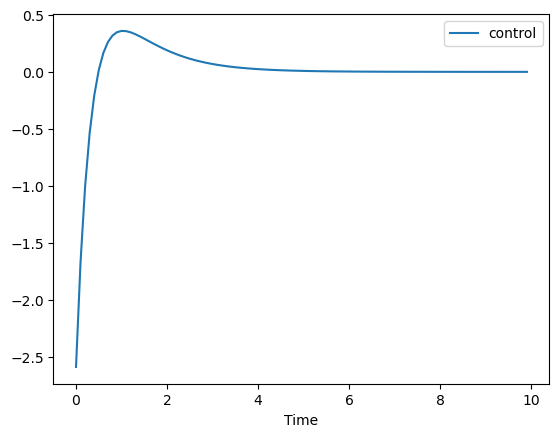

PyObject <matplotlib.legend.Legend object at 0x1742a9970>

In [25]:
plot(times[1:end-1], uhist, label="control")
xlabel("Time")
legend()

In [26]:
J(xhist,uhist)

6.658612208961312